<a href="https://colab.research.google.com/github/ShreshtaP/-Shreshta_INFO5731_-Fall2021/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [30]:
# Write your code here
!pip install pyLDAvis 
!pip install ipympl
%matplotlib ipympl
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk



In [31]:
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words('english'))
# stop = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')
p_stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
import pandas as pd
from google.colab import files
filesuploaded = files.upload()

Saving reviews.csv to reviews.csv


In [36]:
dataread = pd.read_csv('reviews.csv',encoding='ISO-8859-1') 

In [37]:
from nltk.corpus import stopwords
from textblob import TextBlob
data['Lower Case'] = data['Cleaned data'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
data['Tokenization'] = data['Lower Case'].apply(lambda x: tokenizer.tokenize(x))
data['Stemming'] = data['Tokenization'].apply(lambda x: [p_stemmer.stem(i) for i in x])

In [39]:
text_data_retrieved = []
for line in data['Stemming']:
  text_data_retrieved.append(line)

In [40]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [42]:
from gensim import corpora, models
bigram_sam = models.Phrases(text_data, min_count=5, threshold=100)
trigram_sam = models.Phrases(bigram[text_data], threshold=100)
bigram_model_sample = models.phrases.Phraser(bigram_sam)
trigram_model_sample = models.phrases.Phraser(trigram_sam)
print(trigram_model_sample[bigram_model_sample[text_data[0]]])

['i', 'love', 'everi', 'second', 'of', 'the', 'visual', 'it', 'is', 'a', 'masterpiec', 'with', 'superb', 'act', 'and', 'music']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [44]:
def make_bigrams(text_data):
    return [bigram_model_sample[doc] for doc in texts]

def make_trigrams(text_data):
    return [trigram_model[bigram_model_sample[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_output = []
    for sent in textsmesg:
        doc = nlp(" ".join(sent)) 
        texts_output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_output

import spacy
data_words_bigram_models = make_bigram_models(text_data)
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized_text = lemmatization(data_words_bigram_models, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized_output=[:1])

[['love', 'everi', 'second', 'visual', 'masterpiec', 'music']]


In [46]:
id2word = corpora.Dictionary(data_lemmatized_output)#For dictionary and corpus
text_data = data_lemmatized_output
corpus = [id2word.doc2bow(text_data) for text in matter]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]]


In [47]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('everi', 1),
  ('love', 1),
  ('masterpiec', 1),
  ('music', 1),
  ('second', 1),
  ('visual', 1)]]

In [48]:
lda_model_sample = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

from print import pprint
pprint(lda_model_sample.print_topics())
doc_lda = lda_model_sample[corpus]

[(0,
  '0.125*"choreographi" + 0.070*"see" + 0.069*"onli" + 0.066*"incre" + '
  '0.066*"fight" + 0.061*"how" + 0.061*"camera" + 0.059*"skill" + '
  '0.059*"highlight" + 0.059*"match"'),
 (1,
  '0.058*"more" + 0.040*"will" + 0.017*"do" + 0.017*"drama" + 0.017*"perhap" + '
  '0.017*"black" + 0.017*"may" + 0.012*"say" + 0.011*"here" + 0.011*"execut"'),
 (2,
  '0.114*"new" + 0.102*"enjoy" + 0.102*"superhero" + 0.097*"introduct" + '
  '0.084*"scene" + 0.079*"dialogu" + 0.079*"goosebump" + 0.043*"build" + '
  '0.016*"perfect" + 0.008*"few"'),
 (3,
  '0.280*"top" + 0.060*"film" + 0.023*"bit" + 0.020*"away" + 0.020*"big" + '
  '0.020*"surpris" + 0.019*"could" + 0.018*"s" + 0.018*"actual" + '
  '0.018*"predict"'),
 (4,
  '0.144*"film" + 0.067*"thi" + 0.066*"wonder" + 0.065*"start" + '
  '0.065*"finish" + 0.063*"find" + 0.063*"everi" + 0.063*"visual" + '
  '0.062*"effect" + 0.062*"enjoy"'),
 (5,
  '0.110*"art" + 0.108*"martial" + 0.079*"scene" + 0.076*"absolut" + '
  '0.073*"movi" + 0.071*"get" 

In [49]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda_sample = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda_sample = coherence_model_lda_sample.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.307455594438658

Coherence Score:  0.4262361873853375


In [50]:
!pip install pyLDAvis

In [51]:
from pprint import pprint
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess_sample
from gensim.models import CoherenceModel
# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis]


import matplotlib.pyplot as plt
%matplotlib inline
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
#LSA MODEL
lsamodel_sample = models.LsiModel(corpus, num_topics = 25, id2word = id2word)

pprint(lsamodel_sample.print_topics(num_topics = 25))

[(0,
  '0.547*"film" + 0.282*"thi" + 0.270*"visual" + 0.252*"effect" + '
  '0.249*"enjoy" + 0.241*"everi" + 0.241*"second" + 0.237*"wonder" + '
  '0.181*"engag" + 0.175*"start"'),
 (1,
  '0.418*"well" + 0.286*"great" + 0.283*"action" + 0.263*"sequenc" + '
  '0.215*"art" + 0.214*"martial" + 0.211*"choreographi" + 0.208*"good" + '
  '0.205*"cinematographi" + 0.195*"as"'),
 (2,
  '0.312*"film" + 0.253*"marvel" + 0.226*"s" + 0.224*"univer" + 0.209*"ring" + '
  '0.209*"legend" + 0.199*"give" + 0.195*"top" + 0.193*"whole" + '
  '0.190*"origin"'),
 (3,
  '-0.389*"fight" + -0.303*"battl" + -0.302*"even" + -0.301*"dragon" + '
  '-0.296*"job" + -0.294*"action" + -0.289*"great" + 0.252*"well" + '
  '-0.242*"sequenc" + -0.155*"scene"'),
 (4,
  '-0.283*"legend" + -0.283*"ring" + -0.267*"give" + 0.260*"love" + '
  '-0.260*"origin" + -0.259*"top" + -0.257*"easili" + -0.255*"whole" + '
  '0.247*"marvel" + 0.224*"univer"'),
 (5,
  '0.633*"love" + 0.247*"charact" + 0.243*"scene" + 0.168*"movi" + '
  '0.

/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:317: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


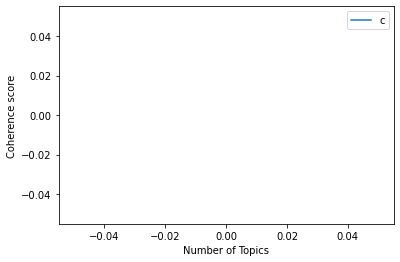

In [53]:
coherence_figures= []
model_lists = []
for no_of_topics in range(2, 12, 1):
  model_name = models.LsiModel(corpus, num_topics = 20, id2word = id2word)
  model_list.append(model)
  coherencemodel_name = CoherenceModel(model= model, texts = data['Stemming'], dictionary = id2word, coherence='c_v')
  coherence_values.append(coherencemodel.get_coherence())

x = range(2, 12, 1)
plt.plot(x, coherence_figures)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_figures"), loc='best')
plt.show()

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [35]:
import seaborn as sns
#sentiment count
sentiment_count_data = data['Cleaned data'].value_counts()
print(sentiment_count_data)

I find this film engaging from start to finish and the visual effects are wonderful and enjoyed every second of the film                                                                               29
Shang-Chi and the Legend of the Tens Rings is easily at the top of the origin films that this franchise has given us and one of my favorite entries as a whole. You'll leave the theater satisfied.    25
Director did a great job in capturing the action and fight sequences. Even with the epic climax of the dragon battle.                                                                                  25
The music score was good as well. The action sequences are great and exciting. Every set piece had an awesome martial arts choreography which was well shot with the cinematography.                   24
We get some absolutely amazing fight scenes which seem right out of a classic Chinese martial arts movie                                                                                        

In [56]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn import model_selection
from sklearn import naive_bayes

tfidf_vect = TfidfVectorizer()
encoder = LabelEncoder()
x = tfidf_vect.fit_transform(data['Cleaned data'].values)

#data is split into training data and testing data
xtrain, xvalid, ytrain, yvalid = model_selection.train_test_split(x, data['Sentiment'],test_size=0.2)

def training_model_data(model_intializer):
  model_sample_data = model_intializer
  model.fit(xtrain, ytrain)
  predicted_sample = model.predict(xvalid)
  accuracy_data = accuracy_score(yvalid, predicted)
  print("Accuracy of Traning data: {0}".format(accuracy))
  print(classification_report(yvalid, predicted))

# Naive-Bayes
training_model_data(naive_bayes.MultinomialNB())

Accuracy of Traning data: 0.9
              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00         1
    negative       0.00      0.00      0.00         6
     neutral       0.00      0.00      0.00         1
    neutral        0.00      0.00      0.00         2
    positive       0.90      1.00      0.95        90

    accuracy                           0.90       100
   macro avg       0.18      0.20      0.19       100
weighted avg       0.81      0.90      0.85       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
# SVM model 
training_model_data(svm.SVC())

Accuracy of Traning data: 0.9
              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00         1
    negative       0.00      0.00      0.00         6
     neutral       0.00      0.00      0.00         1
    neutral        0.00      0.00      0.00         2
    positive       0.90      1.00      0.95        90

    accuracy                           0.90       100
   macro avg       0.18      0.20      0.19       100
weighted avg       0.81      0.90      0.85       100



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [47]:
!pip uninstall numpy
!pip uninstall pandas

!pip install --user numpy
!pip install --user  pandasy


Found existing installation: numpy 1.21.4
Uninstalling numpy-1.21.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.21.4.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-2d23e62b.3.17.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.21.4
Found existing installation: pandas 1.3.4
Uninstalling pandas-1.3.4:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas-1.3.4.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas/*
Proceed (y/n)? y
  Successfully uninstalled pandas-1.3.4
  Using cached numpy-1.21.4-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Consider adding this directory to PATH or, if yo

  Using cached pandas-1.3.4-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


In [1]:
# Write your code here 
import pandas as pd
train_data = pd.read_csv('/content/test.csv')
validation_data = pd.read_csv('/content/train.csv')

In [2]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [4]:
print(train_data.isnull().sum())
validation_data.describe()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
print(validation_data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


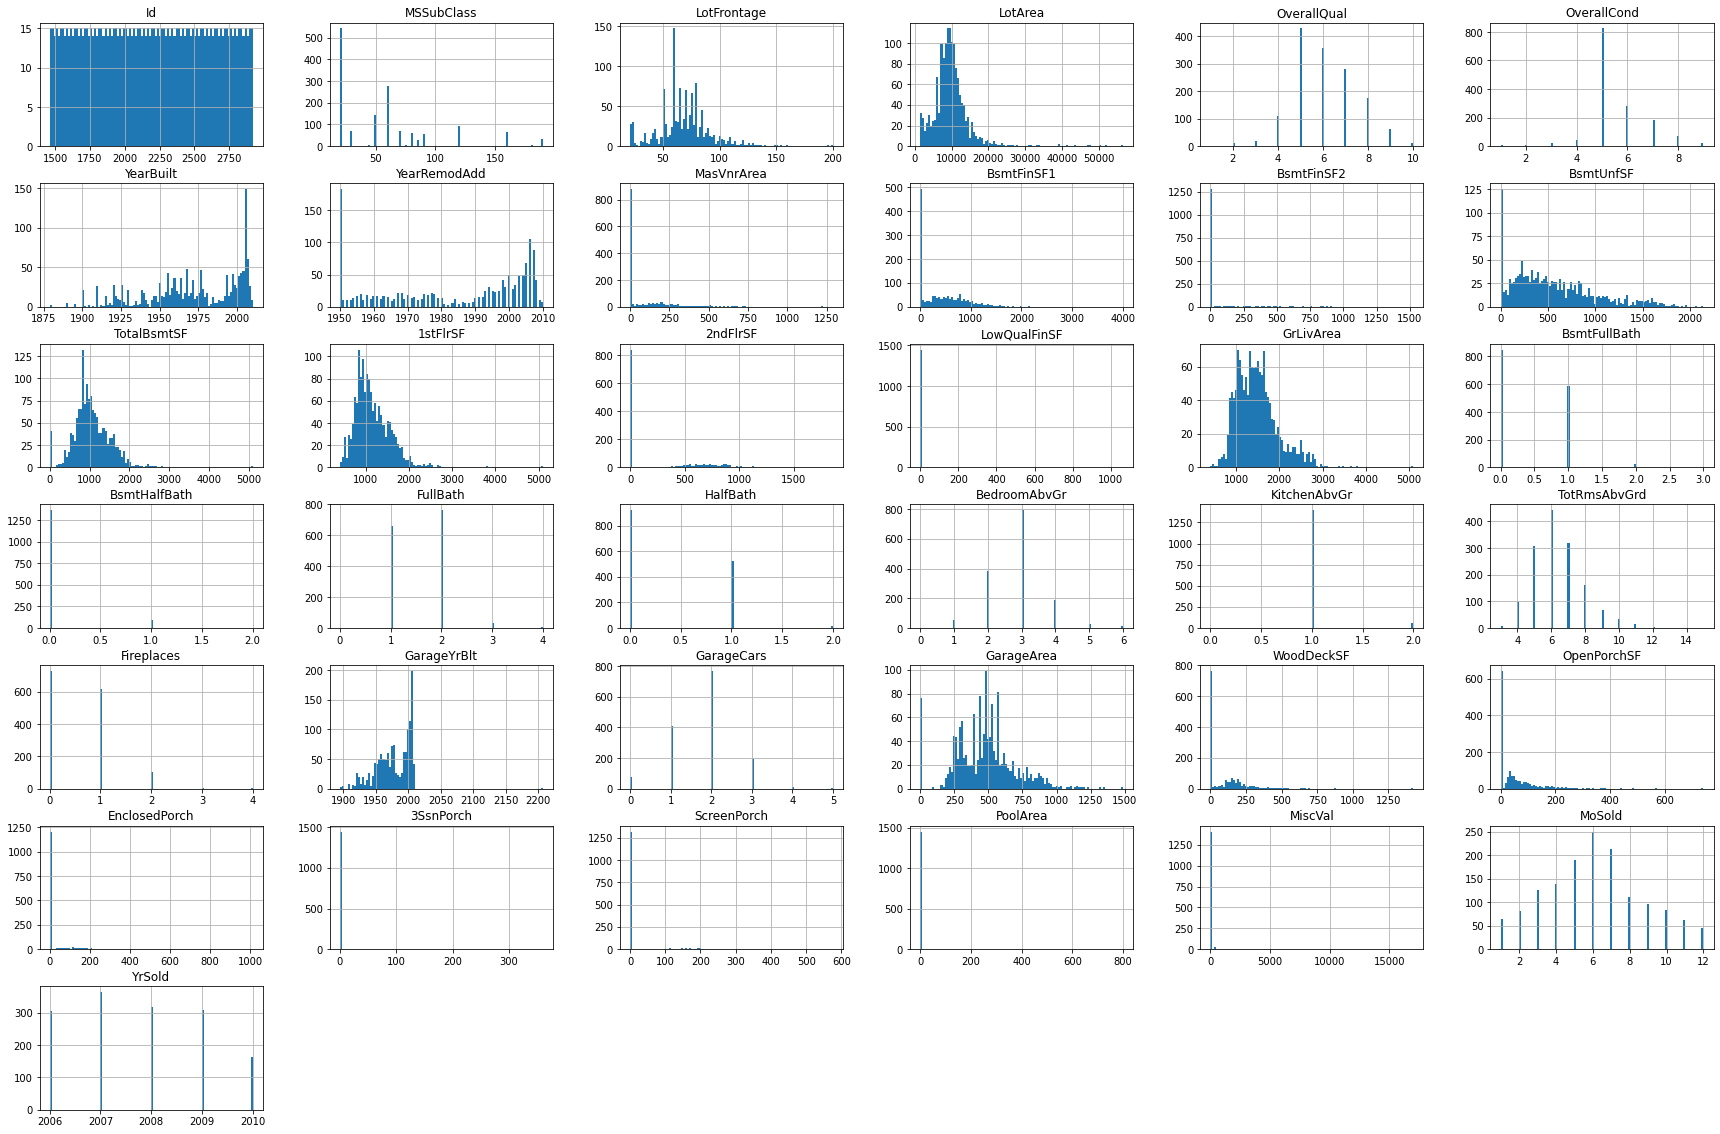

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=100, figsize=(30,20))
plt.savefig("attribute_histogram_plots")
plt.show()

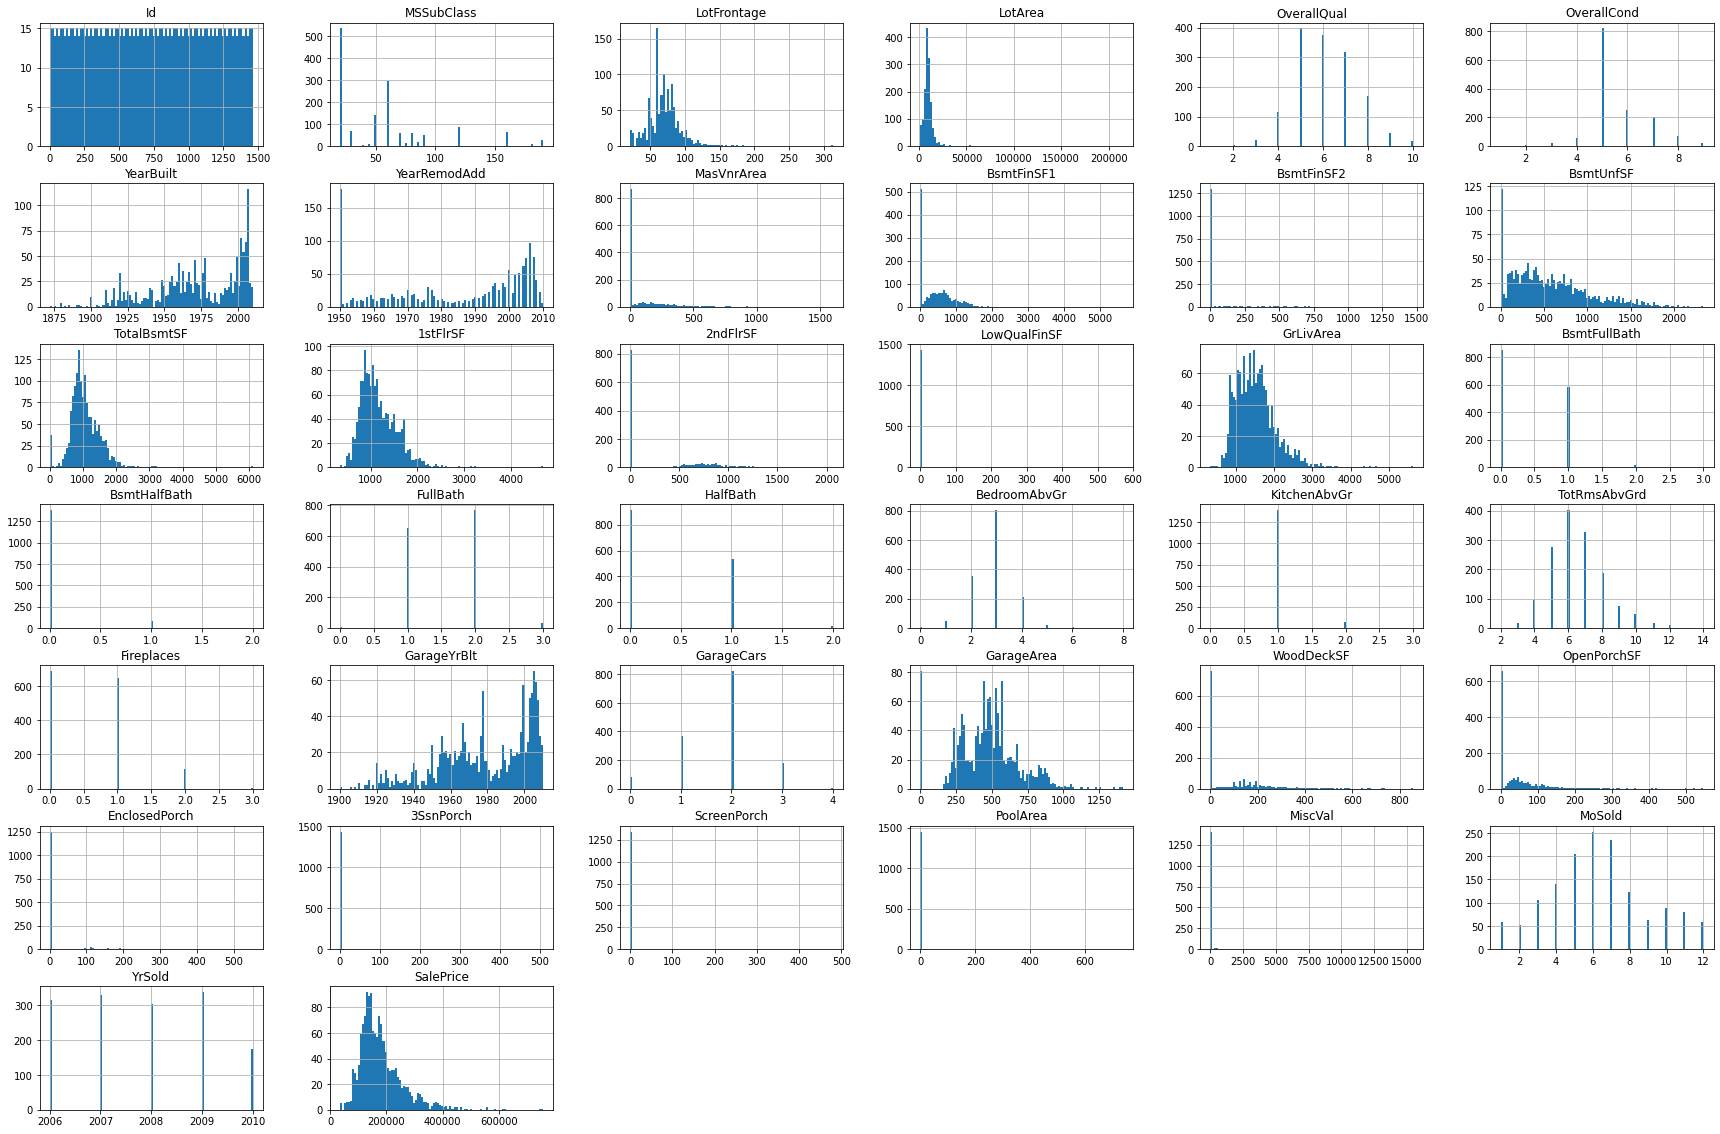

In [10]:
validation_data.hist(bins=100, figsize=(30,20))
plt.savefig("attribute_histogram_plots")
plt.show()

In [11]:
corr_matrix = train_data.corr()
corr_matrix["YrSold"].sort_values(ascending=False)

YrSold           1.000000
KitchenAbvGr     0.038614
BsmtFinSF1       0.030779
YearRemodAdd     0.029715
3SsnPorch        0.027818
LowQualFinSF     0.026864
BsmtFullBath     0.023824
OverallCond      0.015649
HalfBath         0.013504
MiscVal          0.011829
FullBath         0.010283
Fireplaces       0.010002
EnclosedPorch    0.007616
BsmtHalfBath     0.006073
GarageArea       0.000536
BedroomAbvGr    -0.005113
GarageCars      -0.007032
TotalBsmtSF     -0.007817
MSSubClass      -0.008392
GarageYrBlt     -0.008451
2ndFlrSF        -0.010098
YearBuilt       -0.011006
BsmtFinSF2      -0.011749
OverallQual     -0.012291
1stFlrSF        -0.013566
OpenPorchSF     -0.017122
GrLivArea       -0.017434
WoodDeckSF      -0.022818
ScreenPorch     -0.023439
LotFrontage     -0.025263
MasVnrArea      -0.029556
TotRmsAbvGrd    -0.031627
BsmtUnfSF       -0.035214
PoolArea        -0.045185
LotArea         -0.051144
MoSold          -0.163924
Id              -0.974884
Name: YrSold, dtype: float64

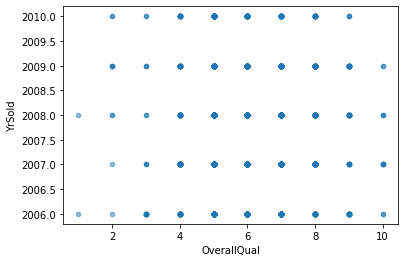

In [12]:
train_data.plot(kind="scatter", x="OverallQual", y="YrSold", alpha=0.5)

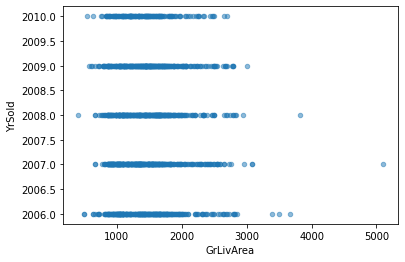

In [13]:
train.plot(kind="scatter", x="GrLivArea", y="YrSold", alpha=0.5)

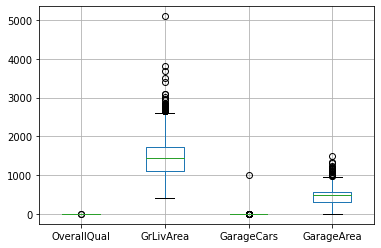

In [26]:
train_data.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])

In [14]:
import numpy as np
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [15]:
train_data.fillna(999, inplace=True)

In [16]:
#Train and build the regression model

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder
columns_info = ('GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotShape', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning','LotConfig')
for i in columns_info:
    encoder = LabelEncoder()
    encoder.fit(list(train[i].values))
    train[i] = encoder.transform(list(train[i].values))
for j in columns_info:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(validation[j].values))
    validation[j] = encoder_test.transform(list(validation[j].values))

x_train_data = train_data[train.columns[:80]]
y_train_data = train_data['YrSold']
x_validation_data = validation_dat[validation_data.columns[:80]]

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_data, y_train_data)

LinearRegression()

In [17]:
import numpy as np
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
train_data.fillna(999, inplace=True)

In [27]:
regressor.predict(x_train_data)

array([4.00000000e+00, 4.00000000e+00, 4.00000000e+00, ...,
       8.45079590e-14, 4.57508265e-13, 1.63556835e-13])